In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [2]:
df=pd.read_csv('Downloads/kc_house_data.csv', encoding="ISO-8859-1")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
#creating new column (house age)
date=[]
for i in range (len(df)):
    date.append(int(df['date'][i][:4]))
df['date']=date
df['age']=df['date']-df['yr_built']

df.drop(['id','yr_built','date'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,-122.319,1690,7639,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,-122.233,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,-122.393,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,-122.045,1800,7503,28


# Visualization

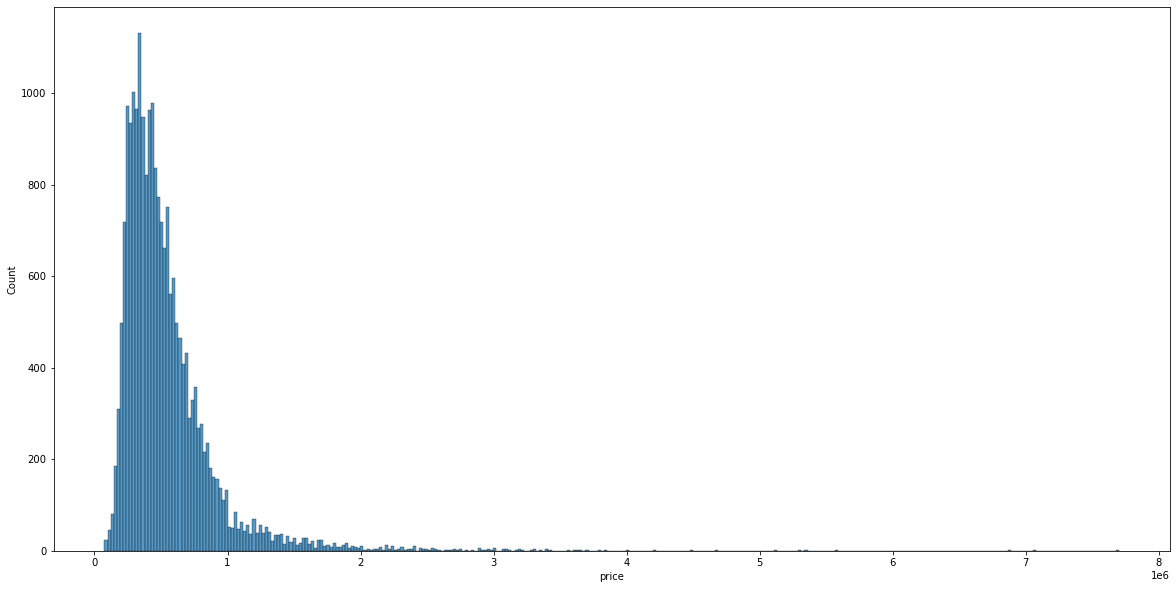

In [6]:
plt.figure(figsize=(20,10))
sns.histplot(df.price, kde=False)
plt.show()

Most house prices are between 200 000 and 1 000 000
We can see a lot of outliers starting from 2 000 000 

<AxesSubplot:xlabel='age', ylabel='Count'>

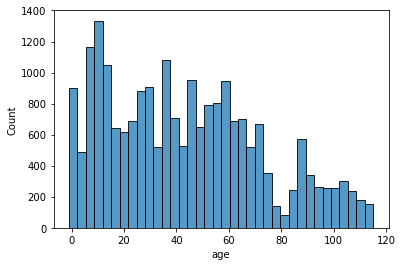

In [7]:
sns.histplot(df.age, kde=False)

House ages vary from 0 to 120 years 
The most frequent age is between 10 and 12 years

<AxesSubplot:xlabel='grade', ylabel='count'>

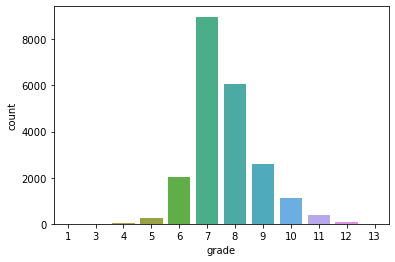

In [8]:
sns.countplot(x='grade', data=df)

More than 8500 house are rated 7 which is the most frequent rating

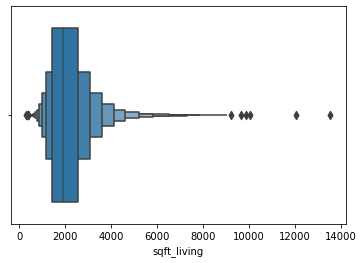

In [9]:
sns.boxenplot(x= "sqft_living", data = df);

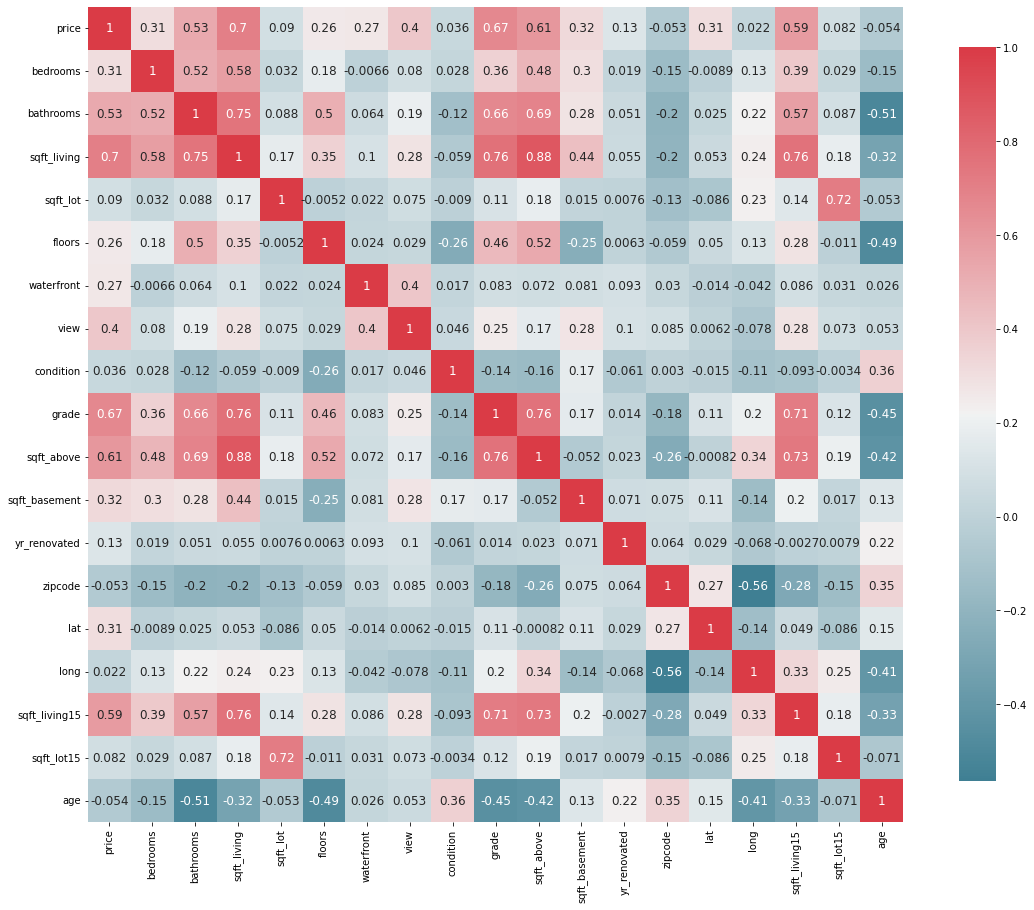

In [10]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 20 , 15 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

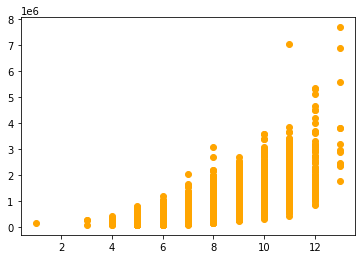

In [11]:
plt.scatter(df['grade'],df['price'],color='Orange')

In [29]:
df[["grade", "price"]].groupby(["grade"], as_index=True).mean()

,price
grade,
1,1.420000e+05
3,2.056667e+05
4,2.143810e+05
5,2.485240e+05
6,3.019196e+05
7,4.025903e+05
8,5.428528e+05
9,7.735132e+05
10,1.071771e+06


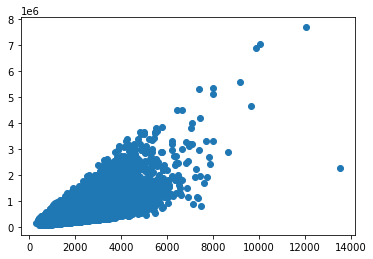

In [13]:
plt.scatter(df['sqft_living'],df['price'])

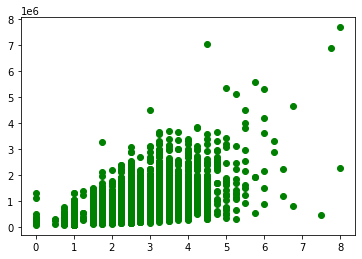

In [14]:
plt.scatter(df['bathrooms'],df['price'],color='Green')

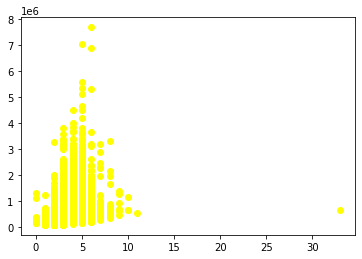

In [31]:
plt.scatter(df['bedrooms'],df['price'],color='Yellow')

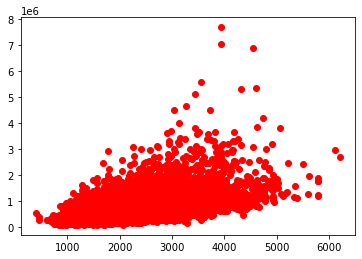

In [15]:
plt.scatter(df['sqft_living15'],df['price'],color='Red')

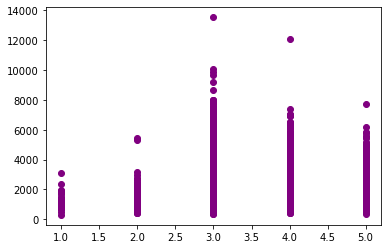

In [18]:
plt.scatter(df['condition'],df['sqft_living'],color='Purple')

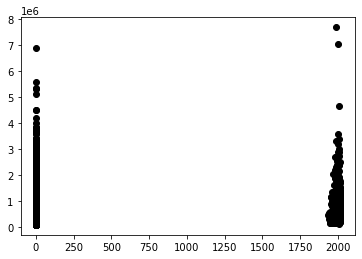

In [22]:
plt.scatter(df['yr_renovated'],df['price'],color='Black')

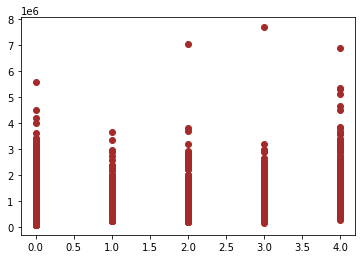

In [23]:
plt.scatter(df['view'],df['price'],color='Brown')

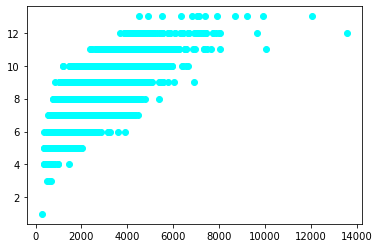

In [25]:
plt.scatter(df['sqft_living'],df['grade'],color='Cyan')

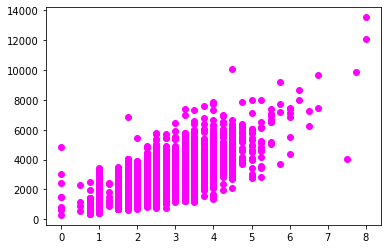

In [28]:
plt.scatter(df['bathrooms'],df['sqft_living'],color='Magenta')

The "sqft_living", "grade", "sqft_living15" and "bathrooms" are the highest correlated data with the "price" data and we can see that the correlations are positive so these might be the best features for the price prediction.

# Regression algorithms

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

def cap_data(df):
    for col in df.columns:
       
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

data=cap_data(df)

C:\Users\21621\AppData\Local\Temp\ipykernel_22640\355135164.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\21621\AppData\Local\Temp\ipykernel_22640\355135164.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]


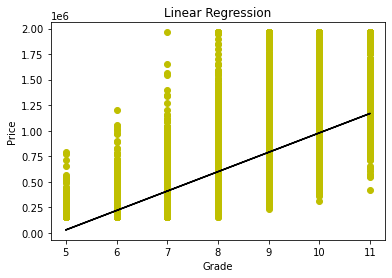

MSE : GP 51854540030.69765
R squared : GP 0.4916688663457437


In [189]:
x=data["grade"].values[:,np.newaxis]
y=data["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.45,random_state=45) 

GP=LinearRegression()   
GP.fit(x_train,y_train)  
predicted=GP.predict(x_test) 

plt.scatter(x,y,color="y")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Grade")
plt.plot(x,GP.predict(x),color="k")
plt.show()

print("MSE : GP", mean_squared_error(y_test,predicted))
print("R squared : GP", metrics.r2_score(y_test,predicted))


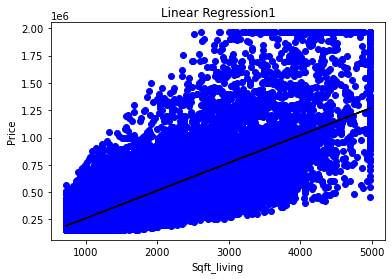

MSE : SQP 50875754317.57625
R squared : SQP 0.5012639230343392


In [190]:
x1=data["sqft_living"].values[:,np.newaxis]
y1=data["price"].values

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.45,random_state=45) 

SP=LinearRegression()   
SP.fit(x1_train,y1_train)  
predicted=SP.predict(x1_test) 

plt.scatter(x1,y1,color="b")
plt.title("Linear Regression1")
plt.ylabel("Price")
plt.xlabel("Sqft_living")
plt.plot(x1,SP.predict(x1),color="k")
plt.show()

print("MSE : SQP", mean_squared_error(y1_test,predicted))
print("R squared : SQP", metrics.r2_score(y1_test,predicted))

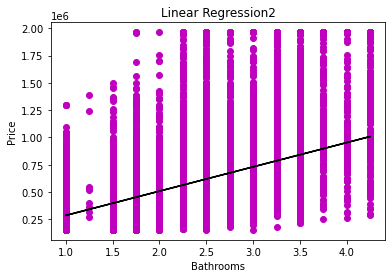

MSE : BTHP 72827711704.47932
R squared : BTHP 0.286068428525886


In [191]:
x2=data["bathrooms"].values[:,np.newaxis]
y2=data["price"].values

x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.45,random_state=45) 

BP=LinearRegression()   
BP.fit(x2_train,y2_train)  
predicted=BP.predict(x2_test) 

plt.scatter(x2,y2,color="m")
plt.title("Linear Regression2")
plt.ylabel("Price")
plt.xlabel("Bathrooms")
plt.plot(x2,BP.predict(x2),color="k")
plt.show()

print("MSE : BTHP", mean_squared_error(y2_test,predicted))
print("R squared : BTHP", metrics.r2_score(y2_test,predicted))



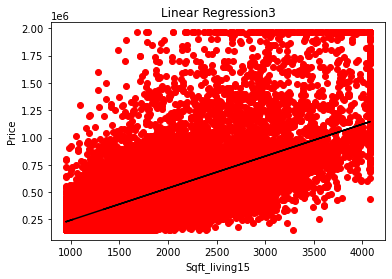

MSE : SQP 63917912591.40765
R squared : SQP 0.3734113744106279


In [192]:
x3=data["sqft_living15"].values[:,np.newaxis]
y3=data["price"].values

x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.45,random_state=45) 

SQP=LinearRegression()   
SQP.fit(x3_train,y3_train)  
predicted=SQP.predict(x3_test) 

plt.scatter(x3,y3,color="r")
plt.title("Linear Regression3")
plt.ylabel("Price")
plt.xlabel("Sqft_living15")
plt.plot(x3,SQP.predict(x3),color="k")
plt.show()

print("MSE : SQP", mean_squared_error(y3_test,predicted))
print("R squared : SQP", metrics.r2_score(y3_test,predicted))


As we can see from the visualization and the performance of the models, we can see that SP (sqft_living/price) model is the best linear regression model.

In [193]:
a=data[["sqft_living","grade"]] 
b=data["price"].values
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.45,random_state=45)


SGP=LinearRegression()
SGP.fit(a_train,b_train) 
predicted=SGP.predict(a_test)



print("MSE", mean_squared_error(b_test,predicted))
print("R squared", metrics.r2_score(b_test,predicted))

MSE 44676715365.8967
R squared 0.5620332307171128


According to the testing the multi-linear regression model is slightly more performent than the linear regression model SP 

In [188]:
from sklearn.preprocessing import PolynomialFeatures 

p=data[["sqft_living","grade"]] 
d=data["price"].values

p_train, p_test, d_train, d_test = train_test_split(p, d, test_size=0.45, random_state=45)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

p_train_fit = poly.fit_transform(p_train) #transforming our input data
lg.fit(p_train_fit, d_train)
p_test_ = poly.fit_transform(p_test)
predicted = lg.predict(p_test_)


print("MSE: ", metrics.mean_squared_error(d_test, predicted))
print("R squared: ", metrics.r2_score(d_test,predicted))



MSE:  40793794731.28906
R squared:  0.6000975823999377


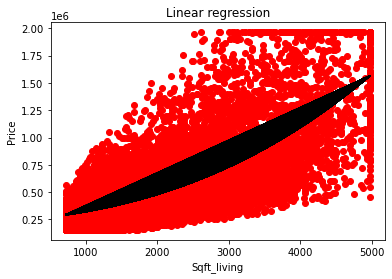

In [182]:
i= data["sqft_living"].values.reshape(-1,1)
j= data["price"].values
poly = PolynomialFeatures(degree = 3) 
i_poly = poly.fit_transform(i) 
poly.fit(i_poly, j) 
lg=LinearRegression()
lg.fit(i_poly, j) 

plt.scatter(i, j, color="r")
plt.title("Linear regression")
plt.ylabel("Price")
plt.xlabel("Sqft_living")
plt.plot(i, lg.predict(poly.fit_transform(i)), color="k") 

The polynomial regression model has the best performance out of all models : it has a better performance than the multi-linear and linear regression models